### The goal of this code is to find which factors may have impacted price changes of AirBnB listings in Copenhagen (19th March 2024 - 11th August 2024)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# read data
data= pd.read_csv('https://data.insideairbnb.com/france/ile-de-france/paris/2024-03-16/data/listings.csv.gz')
data_calendar = pd.read_csv('https://data.insideairbnb.com/france/ile-de-france/paris/2024-03-16/data/calendar.csv.gz')

In [3]:
# Put data into dataframe
df = pd.DataFrame(data)
df_cal = pd.DataFrame(data_calendar)

## EDA

In [4]:
df.head()

id                          listing_url       scrape_id last_scraped  \
0    3109    https://www.airbnb.com/rooms/3109  20240316023852   2024-03-19   
1  165409  https://www.airbnb.com/rooms/165409  20240316023852   2024-03-19   
2    5396    https://www.airbnb.com/rooms/5396  20240316023852   2024-03-18   
3  166370  https://www.airbnb.com/rooms/166370  20240316023852   2024-03-16   
4   39948   https://www.airbnb.com/rooms/39948  20240316023852   2024-03-19   

            source                                          name  \
0      city scrape                                  zen and calm   
1      city scrape               studio charme Haut Marais PARIS   
2      city scrape  Your perfect Paris studio on Île Saint-Louis   
3      city scrape             Big appartment with view 4 people   
4  previous scrape        COSY INDEPENDENT ROOM IN CENTRAL PARIS   

                                         description  \
0  Lovely Appartment with one bedroom with a Quee...   
1            You'll love this typical parisian flat.   
2  NEW SOFA-BED SINCE JUNE 2023, Please disregard...   
3  2 Bedrooms apartment for up to 4 people, with ...   
4  Large newly-renovated guest room in central Pa...   

                               neighborhood_overview  \
0  Good restaurants<br />very close the Montparna...   
1                                                NaN   
2  You are within walking distance to the Louvre,...   
3  The avenue is located nearby the animated dist...   
4  Located in the heart of Paris, The Montorgueil...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...     3631  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...   788732  ...   
2  https://a0.muscache.com/pictures/52413/f9bf76f...     7903  ...   
3  https://a0.muscache.com/pictures/74224563/6c9e...   793032  ...   
4  https://a0.muscache.com/pictures/f898fb0b-e72e...   171483  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        5.00                   5.00                5.00   
1                        4.89                   4.95                4.74   
2                        4.84                   4.96                4.58   
3                        4.79                   4.65                4.48   
4                        4.97                   4.94                4.82   

         license instant_bookable calculated_host_listings_count  \
0  7511409139079                f                              1   
1  7510309597559                f                              1   
2  7510402838018                f                              2   
3  7511007974397                f                              1   
4  7510200734360                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           1   
2                                           1   
3                                           1   
4                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            1   
3                                            0   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.05  
1                                           0              0.69  
2                                           0              2.19  
3                                           0              0.51  
4                                           0              0.99  

[5 rows x 75 columns]

In [5]:
df_cal.head()

listing_id        date available    price adjusted_price  minimum_nights  \
0        3109  2024-03-19         f  $250.00            NaN             2.0   
1        3109  2024-03-20         t  $250.00            NaN             2.0   
2        3109  2024-03-21         t  $250.00            NaN             2.0   
3        3109  2024-03-22         t  $250.00            NaN             2.0   
4        3109  2024-03-23         t  $250.00            NaN             2.0   

   maximum_nights  
0            30.0  
1            30.0  
2            30.0  
3            30.0  
4            30.0

In [6]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
df_cal.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [8]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [9]:
df_cal.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [10]:
df.describe()

id     scrape_id       host_id  host_listings_count  \
count  8.439700e+04  8.439700e+04  8.439700e+04         84390.000000   
mean   4.921666e+17  2.024032e+13  1.618328e+08            28.081917   
std    4.710327e+17  0.000000e+00  1.845142e+08           110.912342   
min    3.109000e+03  2.024032e+13  2.750000e+02             1.000000   
25%    2.642385e+07  2.024032e+13  1.776978e+07             1.000000   
50%    6.361107e+17  2.024032e+13  6.245509e+07             1.000000   
75%    9.664615e+17  2.024032e+13  2.937201e+08             3.000000   
max    1.113055e+18  2.024032e+13  5.672143e+08          2973.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               84390.000000                           0.0  84397.000000   
mean                   35.876774                           NaN     48.864318   
std                   142.925007                           NaN      0.018310   
min                     1.000000                           NaN     48.816080   
25%                     1.000000                           NaN     48.850840   
50%                     2.000000                           NaN     48.865660   
75%                     5.000000                           NaN     48.879314   
max                  5656.000000                           NaN     48.901670   

          longitude  accommodates     bathrooms  ...  \
count  84397.000000  84397.000000  60959.000000  ...   
mean       2.343301      3.219937      1.208763  ...   
std        0.034422      1.672083      0.571918  ...   
min        2.224640      1.000000      0.000000  ...   
25%        2.321190      2.000000      1.000000  ...   
50%        2.346970      3.000000      1.000000  ...   
75%        2.368900      4.000000      1.000000  ...   
max        2.468360     16.000000     48.000000  ...   

       review_scores_cleanliness  review_scores_checkin  \
count               58797.000000           58784.000000   
mean                    4.640605               4.804286   
std                     0.463022               0.369701   
min                     0.000000               0.000000   
25%                     4.500000               4.760000   
50%                     4.770000               4.920000   
75%                     5.000000               5.000000   
max                     5.000000               5.000000   

       review_scores_communication  review_scores_location  \
count                 58795.000000            58787.000000   
mean                      4.825558                4.808457   
std                       0.357243                0.321243   
min                       0.000000                0.000000   
25%                       4.800000                4.750000   
50%                       4.950000                4.910000   
75%                       5.000000                5.000000   
max                       5.000000                5.000000   

       review_scores_value  calculated_host_listings_count  \
count         58782.000000                    84397.000000   
mean              4.618364                       20.641148   
std               0.440632                       79.924969   
min               0.000000                        1.000000   
25%               4.500000                        1.000000   
50%               4.710000                        1.000000   
75%               4.900000                        2.000000   
max               5.000000                      676.000000   

       calculated_host_listings_count_entire_homes  \
count                                 84397.000000   
mean                                     20.069386   
std                                      79.735978   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%                                       2.000000   
max                                     676.000000   

     

In [11]:
# Look for duplicates
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, number_of_

In [12]:
# Look for duplicates
duplicates_cal = df_cal[df_cal.duplicated()]
print(duplicates_cal)

Empty DataFrame
Columns: [listing_id, date, available, price, adjusted_price, minimum_nights, maximum_nights]
Index: []


In [13]:
print(df['id'].value_counts())

id
3109                   1
903528213569628554     1
904317794167423250     1
902923110675044751     1
904316342116849483     1
                      ..
37258181               1
37393264               1
37392952               1
37253478               1
1112849968490989659    1
Name: count, Length: 84397, dtype: int64


In [14]:
print(df_cal['listing_id'].value_counts())

listing_id
958670939769924159     366
38740561               366
1075854586352858052    366
779730147794034483     366
1029534749155197159    366
                      ... 
37387053               365
37476015               365
37387019               365
43849254               348
43849195               348
Name: count, Length: 84397, dtype: int64


Calendar and Listings have the same amount of listing ids

In [15]:
# Looking at format of host_response_rate
df['host_response_rate'].value_counts()

host_response_rate
100%    37075
90%      1197
0%       1176
98%      1136
99%       669
        ...  
52%         1
49%         1
48%         1
74%         1
2%          1
Name: count, Length: 96, dtype: int64

In [16]:
# Convert date to datetime
df_cal['date'] = pd.to_datetime(df_cal['date'])
df_cal.sort_values(by='date', inplace=True)

In [17]:
# Reduce calendar to interesting time interval (19th March 2024 - 11th August 2024)
df_cal = df_cal[df_cal['date']<='2024-08-11']
df_cal.tail()

listing_id       date available    price adjusted_price  \
10080300    36659633 2024-08-11         t   $87.00            NaN   
635976       1626998 2024-08-11         f   $55.00            NaN   
6577189     21601580 2024-08-11         f   $42.00            NaN   
6096740     20011660 2024-08-11         f   $60.00            NaN   
10113566    36747051 2024-08-11         f  $150.00            NaN   

          minimum_nights  maximum_nights  
10080300             1.0          1125.0  
635976               7.0            40.0  
6577189            365.0          1125.0  
6096740              1.0          1125.0  
10113566           365.0          1125.0

In [18]:
df_cal.head()

listing_id       date available    price adjusted_price  \
23569852  978048124240489982 2024-03-16         f  $330.00            NaN   
20878512  912209463117848679 2024-03-16         f  $150.00            NaN   
24052427  990436331239331181 2024-03-16         f  $202.00            NaN   
1436636              4357693 2024-03-16         f  $110.00            NaN   
21481014  925293165230489678 2024-03-16         f  $250.00            NaN   

          minimum_nights  maximum_nights  
23569852             1.0           365.0  
20878512             7.0           365.0  
24052427             1.0           110.0  
1436636            365.0          1125.0  
21481014             2.0           365.0

In [19]:
df_cal.isna().sum()

listing_id               0
date                     0
available                0
price                    0
adjusted_price    12389053
minimum_nights           1
maximum_nights           1
dtype: int64

In [20]:
df_cal.drop(['adjusted_price'], axis=1, inplace=True)

In [21]:
df_cal.columns

Index(['listing_id', 'date', 'available', 'price', 'minimum_nights',
       'maximum_nights'],
      dtype='object')

In [ ]:
#Remove $ and commas and convert price to a numeric
df_cal['price'] = df_cal['price'].str.replace('[\$,]', '', regex=True)
df_cal['price'] = pd.to_numeric(df_cal['price'])

In [23]:
#Drop unuseful columns in listings
df_cleaned = df.drop(['name', 'host_id', 'host_name', 'neighbourhood_group_cleansed', 'neighbourhood','calendar_updated','first_review','last_review',
                      'last_scraped', 'scrape_id', 'calendar_last_scraped', 'host_about', 'host_thumbnail_url', 'host_picture_url','picture_url','host_url',
                      'host_verifications', 'host_neighbourhood','description','bathrooms', 'bathrooms_text','availability_30', 'availability_60', 'availability_90','maximum_nights', 'minimum_nights',
                      'minimum_minimum_nights', 'maximum_minimum_nights','minimum_maximum_nights', 'maximum_maximum_nights','neighborhood_overview',
                      'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                      'host_location', 'beds','has_availability','amenities','listing_url','source','host_since'], axis=1)
df_cleaned.columns

Index(['id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'price', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'instant_bookable', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              84397 non-null  int64  
 1   host_response_time              48310 non-null  object 
 2   host_response_rate              48310 non-null  object 
 3   host_acceptance_rate            56521 non-null  object 
 4   host_is_superhost               84306 non-null  object 
 5   host_listings_count             84390 non-null  float64
 6   host_total_listings_count       84390 non-null  float64
 7   host_has_profile_pic            84390 non-null  object 
 8   host_identity_verified          84390 non-null  object 
 9   neighbourhood_cleansed          84397 non-null  object 
 10  latitude                        84397 non-null  float64
 11  longitude                       84397 non-null  float64
 12  property_type                   

In [25]:
# Check missing values of listings
df_cleaned.isna().sum().sort_values(ascending=False)

host_response_rate                36087
host_response_time                36087
host_acceptance_rate              27876
review_scores_value               25615
review_scores_checkin             25613
review_scores_location            25610
review_scores_accuracy            25604
review_scores_communication       25602
review_scores_cleanliness         25600
reviews_per_month                 25575
review_scores_rating              25570
price                             23480
license                           19800
bedrooms                           6917
host_is_superhost                    91
host_identity_verified                7
host_has_profile_pic                  7
host_total_listings_count             7
host_listings_count                   7
number_of_reviews_l30d                0
instant_bookable                      0
calculated_host_listings_count        0
id                                    0
number_of_reviews_ltm                 0
number_of_reviews                     0


In [26]:
#Transform licenses to true or false with One-hot encoding (True or False), we assume that when there is something else than a missing value, that there is some sort of license
df_cleaned['license'] = df_cleaned['license'].notna().astype(int)
df_cleaned['license'] = df_cleaned['license'].fillna(0)

#Transform all boolean values to 0 (False) and 1 (True)
df_cleaned['host_is_superhost'] = df_cleaned['host_is_superhost'].apply(
    lambda x: 0 if x == 'f' else 1 if x == 't' else None)
df_cleaned['host_has_profile_pic'] = df_cleaned['host_has_profile_pic'].apply(
    lambda x: 0 if x == 'f' else 1 if x == 't' else None)
df_cleaned['host_identity_verified'] = df_cleaned['host_identity_verified'].apply(
    lambda x: 0 if x == 'f' else 1 if x == 't' else None)
df_cleaned['instant_bookable'] = df_cleaned['instant_bookable'].apply(
    lambda x: 0 if x == 'f' else 1 if x == 't' else None)

print(df_cleaned[['license','host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']].head())

# changing host_response_rate,host_acceptance_rate, price to number
# Ensure 'host_acceptance_rate' and 'host_response_rate' are strings before processing
df_cleaned['host_acceptance_rate'] = df_cleaned['host_acceptance_rate'].astype(str).str.replace('%', '', regex=True)
df_cleaned['host_response_rate'] = df_cleaned['host_response_rate'].astype(str).str.replace('%', '', regex=True)

# Replace 'NaN' strings with np.nan
df_cleaned['host_acceptance_rate'] = df_cleaned['host_acceptance_rate'].replace(['NaN', 'nan', 'None'], np.nan)
df_cleaned['host_response_rate'] = df_cleaned['host_response_rate'].replace(['NaN', 'nan', 'None'], np.nan)

# Now convert to floats, normalize to 0-1 scale and fill missing values with 0
df_cleaned['host_acceptance_rate'] = df_cleaned['host_acceptance_rate'].astype(float).div(100).fillna(0)
df_cleaned['host_response_rate'] = df_cleaned['host_response_rate'].astype(float).div(100).fillna(0)

print(df_cleaned[['host_response_rate', 'host_acceptance_rate']])

   license  host_is_superhost  host_has_profile_pic  host_identity_verified  \
0        1                0.0                   1.0                     0.0   
1        1                1.0                   1.0                     1.0   
2        1                0.0                   1.0                     1.0   
3        1                0.0                   1.0                     1.0   
4        1                1.0                   1.0                     1.0   

   instant_bookable  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
       host_response_rate  host_acceptance_rate
0                    1.00                  0.80
1                    1.00                  0.96
2                    1.00                  0.97
3                    0.00                  0.07
4                    1.00                  0.89
...                   ...                   ...
84392                0.99                  1.00
84393    

In [27]:
#Label Encoding
le_neighbourhood = LabelEncoder()
le_room = LabelEncoder()
le_property = LabelEncoder()
le_response_time = LabelEncoder()

df_cleaned['neighbourhood_cleansed'] = le_neighbourhood.fit_transform(df_cleaned['neighbourhood_cleansed'])
df_cleaned['room_type'] = le_room.fit_transform(df_cleaned['room_type'])
df_cleaned['property_type'] = le_property.fit_transform(df_cleaned['property_type'])
df_cleaned['host_response_time'] = le_response_time.fit_transform(df_cleaned['host_response_time'])

#Get mapping of Encoding
label_mapping_neighbourhood = dict(zip(le_neighbourhood.classes_, range(len(le_neighbourhood.classes_))))
print(label_mapping_neighbourhood)
label_mapping_room = dict(zip(le_room.classes_, range(len(le_room.classes_))))
print(label_mapping_room)
label_mapping_property = dict(zip(le_property.classes_, range(len(le_property.classes_))))
print(label_mapping_property)
label_mapping_response_time = dict(zip(le_response_time.classes_, range(len(le_response_time.classes_))))
print(label_mapping_response_time)

{'Batignolles-Monceau': 0, 'Bourse': 1, 'Buttes-Chaumont': 2, 'Buttes-Montmartre': 3, 'Entrepôt': 4, 'Gobelins': 5, 'Hôtel-de-Ville': 6, 'Louvre': 7, 'Luxembourg': 8, 'Ménilmontant': 9, 'Observatoire': 10, 'Opéra': 11, 'Palais-Bourbon': 12, 'Panthéon': 13, 'Passy': 14, 'Popincourt': 15, 'Reuilly': 16, 'Temple': 17, 'Vaugirard': 18, 'Élysée': 19}
{'Entire home/apt': 0, 'Hotel room': 1, 'Private room': 2, 'Shared room': 3}
{'Barn': 0, 'Boat': 1, 'Camper/RV': 2, 'Casa particular': 3, 'Castle': 4, 'Cave': 5, 'Dome': 6, 'Earthen home': 7, 'Entire bed and breakfast': 8, 'Entire bungalow': 9, 'Entire condo': 10, 'Entire guest suite': 11, 'Entire guesthouse': 12, 'Entire home': 13, 'Entire home/apt': 14, 'Entire loft': 15, 'Entire place': 16, 'Entire rental unit': 17, 'Entire serviced apartment': 18, 'Entire townhouse': 19, 'Entire vacation home': 20, 'Entire villa': 21, 'Floor': 22, 'Houseboat': 23, 'Private room': 24, 'Private room in bed and breakfast': 25, 'Private room in boat': 26, 'Priv

In [28]:
df_cleaned.dtypes

id                                  int64
host_response_time                  int64
host_response_rate                float64
host_acceptance_rate              float64
host_is_superhost                 float64
host_listings_count               float64
host_total_listings_count         float64
host_has_profile_pic              float64
host_identity_verified            float64
neighbourhood_cleansed              int64
latitude                          float64
longitude                         float64
property_type                       int64
room_type                           int64
accommodates                        int64
bedrooms                          float64
price                              object
minimum_nights_avg_ntm            float64
maximum_nights_avg_ntm            float64
availability_365                    int64
number_of_reviews                   int64
number_of_reviews_ltm               int64
number_of_reviews_l30d              int64
review_scores_rating              

In [ ]:
#Handle the rest of missing values
columns_0 = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'reviews_per_month'] #Assign 0
columns_1 = ['host_total_listings_count', 'host_listings_count', 'bedrooms'] #Assign 1
review_columns = ['review_scores_value', 'review_scores_checkin', 'review_scores_location', 'review_scores_accuracy', 'review_scores_communication', 'review_scores_cleanliness', 'review_scores_rating'] #Assign mean

for column in columns_0:
    df_cleaned[column].fillna(0, inplace=True)
for column in columns_1:
    df_cleaned[column].fillna(1, inplace=True)
for column in review_columns:
    df_cleaned[column].fillna(df_cleaned[column].mean(), inplace=True)

In [30]:
# Check missing values of listings
df_cleaned.isna().sum().sort_values(ascending=False)

price                             23480
review_scores_cleanliness             0
availability_365                      0
number_of_reviews                     0
number_of_reviews_ltm                 0
number_of_reviews_l30d                0
review_scores_rating                  0
review_scores_accuracy                0
id                                    0
maximum_nights_avg_ntm                0
review_scores_communication           0
review_scores_location                0
review_scores_value                   0
license                               0
instant_bookable                      0
calculated_host_listings_count        0
review_scores_checkin                 0
minimum_nights_avg_ntm                0
host_response_time                    0
bedrooms                              0
accommodates                          0
room_type                             0
property_type                         0
longitude                             0
latitude                              0


In [31]:
# Calculate price changes

# Compute first and last price per listing_id from calendar df
price_changes = df_cal.groupby('listing_id')['price'].agg([lambda x: x.iloc[0], lambda x: x.iloc[-1]])
price_changes.columns = ['first_price', 'last_price']  # Rename columns
price_changes['price_change'] = price_changes['last_price'] - price_changes['first_price']

# Merge results into df_cleaned
df_cleaned = df_cleaned.merge(price_changes[['price_change', 'last_price']], left_on='id', right_index=True, how='left')

df_cleaned.head()

id  host_response_time  host_response_rate  host_acceptance_rate  \
0    3109                   1                 1.0                  0.80   
1  165409                   2                 1.0                  0.96   
2    5396                   3                 1.0                  0.97   
3  166370                   4                 0.0                  0.07   
4   39948                   1                 1.0                  0.89   

   host_is_superhost  host_listings_count  host_total_listings_count  \
0                0.0                  1.0                        2.0   
1                1.0                  1.0                        1.0   
2                0.0                  2.0                        3.0   
3                0.0                  1.0                        3.0   
4                1.0                  1.0                        2.0   

   host_has_profile_pic  host_identity_verified  neighbourhood_cleansed  ...  \
0                   1.0                     0.0                      10  ...   
1                   1.0                     1.0                      17  ...   
2                   1.0                     1.0                       6  ...   
3                   1.0                     1.0                       4  ...   
4                   1.0                     1.0                       1  ...   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   5.00                         5.00                    5.00   
1                   4.87                         4.89                    4.95   
2                   4.81                         4.84                    4.96   
3                   4.82                         4.79                    4.65   
4                   4.96                         4.97                    4.94   

   review_scores_value  license  instant_bookable  \
0                 5.00        1                 0   
1                 4.74        1                 0   
2                 4.58        1                 0   
3                 4.48        1                 0   
4                 4.82        1                 0   

  calculated_host_listings_count  reviews_per_month  price_change  last_price  
0                              1               0.05           0.0       250.0  
1                              1               0.69           0.0       133.0  
2                              2               2.19           0.0       150.0  
3                              1               0.51           0.0       200.0  
4                              1               0.99           0.0        90.0  

[5 rows x 36 columns]

In [32]:
# Listings with positive and negative price changes
df_cleaned[(df_cleaned['price_change']>0) | (df_cleaned['price_change']<0)]

id  host_response_time  host_response_rate  \
17120             20471159                   4                0.00   
17124             20471160                   4                0.00   
17131             20471163                   4                0.00   
17135             20471723                   4                0.00   
17372             20731119                   4                0.00   
27919             37281603                   4                0.00   
28126             37250543                   4                0.00   
36163             50773342                   2                1.00   
37027             51817259                   3                1.00   
37057             51832624                   3                1.00   
37058             51832634                   3                1.00   
38739             54066057                   3                0.96   
40148   588250406117563784                   4                0.00   
46465   722521586586385621                   4                0.00   
48126   765803775581031358                   2                1.00   
54800   886704890754171862                   4                0.00   
55086   888922355467631206                   3                1.00   
55387   891961128789448188                   2                1.00   
55389   891975822419484407                   4                0.00   
57399   914290122440074636                   4                0.00   
60323   938390308512137866                   4                0.00   
61953   952914651862658637                   2                1.00   
61960   952916855543058557                   2                1.00   
61961   952922603477929712                   2                1.00   
62152   952882552582987523                   4                0.00   
62182   954858109056796899                   2                1.00   
64915   980173407475251213                   3                1.00   
68451  1013024145346387920                   4                0.00   
69240  1020218230096891401                   2                1.00   
69254  1020229252567137407                   2                1.00   
70121  1026700984469644895                   2                1.00   
70659  1031687430365604539                   2                1.00   

       host_acceptance_rate  host_is_superhost  host_listings_count  \
17120                  0.88                0.0                  5.0   
17124                  0.88                0.0                  5.0   
17131                  0.88                0.0                  5.0   
17135                  0.00                0.0                  1.0   
17372                  0.88                0.0                  5.0   
27919                  1.00                0.0                  1.0   
28126                  0.83                0.0                  1.0   
36163                  1.00                0.0                  4.0   
37027                  1.00                1.0                 33.0   
37057                  1.00                1.0                 33.0   
37058                  1.00                1.0                 33.0   
38739                  0.99                1.0                 13.0   
40148                  1.00                0.0                  1.0   
46465                  0.20                0.0                  2.0   
48126                  0.81                0.0                 22.0   
54800                  0.00                0.0                  1.0   
55086                  1.00                1.0                 33.0   
55387                  0.81                0.0                 22.0   
55389                  0.00                0.0                  2.0   
57399                  0.86                0.0                  1.0   
60323                  1.00                0.0                  2.0   
61953                  0.81                0.0                 22.0   
61960                  0.81                0.0                 22.0   
61961    

In [33]:
df_pricechange = df_cleaned[(df_cleaned['price_change']>0) | (df_cleaned['price_change']<0)]

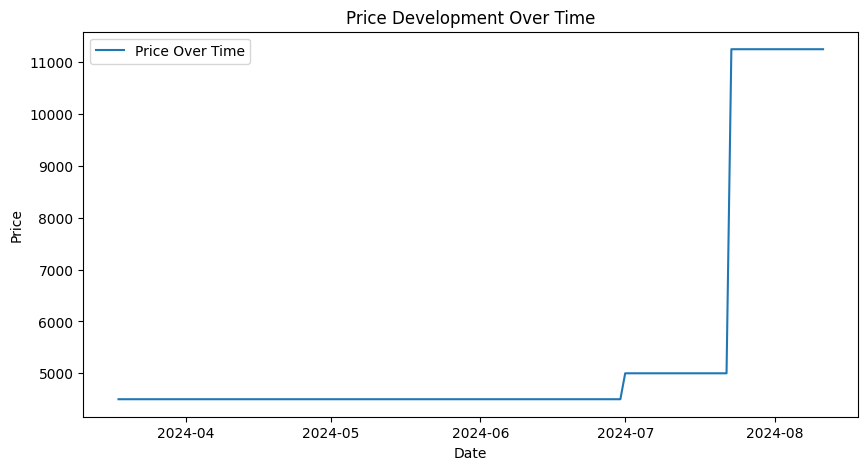

In [34]:
#Graph price development of a listing with positive price change
plt.figure(figsize=(10, 5))
plt.plot(df_cal.loc[df_cal['listing_id']==20471159, 'date'], df_cal.loc[df_cal['listing_id']==20471159, 'price'], label='Price Over Time')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price Development Over Time")
plt.legend()
plt.show()


In [ ]:
# Drop price
df_cleaned.drop('price', axis=1, inplace=True)

# Rename 'last_price' to 'price' as it will replace our original price, which we dropped before
# This price is more accurate, has no missing values
df_cleaned.rename(columns={'last_price':'price'}, inplace=True)

#Do the same for the price_change dataframe
df_pricechange.drop('price', axis=1, inplace=True)
df_pricechange.rename(columns={'last_price':'price'}, inplace=True)

In [36]:
# Check missing values of listings
df_cleaned.isna().sum().sort_values(ascending=False)

id                                0
review_scores_communication       0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_location            0
availability_365                  0
review_scores_value               0
license                           0
instant_bookable                  0
calculated_host_listings_count    0
reviews_per_month                 0
price_change                      0
number_of_reviews                 0
maximum_nights_avg_ntm            0
host_response_time                0
host_identity_verified            0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_listings_count               0
host_total_listings_count         0
host_has_profile_pic              0
neighbourhood_cleansed            0
minimum_nights_avg_ntm      

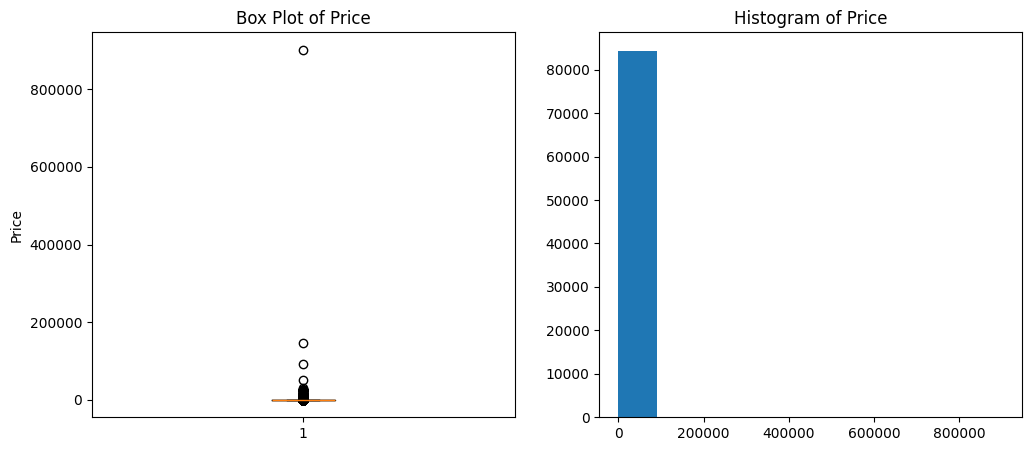

In [37]:
# Investigating price column
plt.figure(figsize=(12, 5))

# Plotting Box Plot
plt.subplot(1, 2, 1)
plt.boxplot(df_cleaned['price'])
plt.ylabel("Price")
plt.title("Box Plot of Price")

# Plotting a histogram
plt.subplot(1, 2, 2)
plt.hist(df_cleaned['price'])
plt.title("Histogram of Price")

plt.show()

In [38]:
#function for correlation and coviarance
def corr_cov(df:pd.DataFrame):
    # Initialize empty matrices
    correlation_matrix = pd.DataFrame(columns=df.columns, index=df.columns)
    covariance_matrix = pd.DataFrame(columns=df.columns, index=df.columns)
    # Loop through each pair of columns
    for col1 in df.columns:
        column1 = df[col1].tolist()  # Convert first column to list

        # Calculate mean of first column
        total1 = 0
        n = len(column1)
        for value in column1:
            total1 += value
        mean1 = total1 / n

        for col2 in df.columns:
            column2 = df[col2].tolist()  # Convert second column to list

            # Calculate mean of second column
            total2 = 0
            for value in column2:
                total2 += value
            mean2 = total2 / n

            # Calculate covariance
            sum_of_products = 0
            for i in range(n):
                diff1 = column1[i] - mean1
                diff2 = column2[i] - mean2
                product = diff1 * diff2
                sum_of_products += product
            covariance = sum_of_products / n

            # Calculate std for correlation
            squared_diff_sum1 = 0
            squared_diff_sum2 = 0
            for i in range(n):
                diff1 = column1[i] - mean1
                diff2 = column2[i] - mean2
                squared_diff_sum1 += diff1 * diff1
                squared_diff_sum2 += diff2 * diff2
            std1 = (squared_diff_sum1 / n) ** 0.5
            std2 = (squared_diff_sum2 / n) ** 0.5

            # Calculate correlation
            if std1 == 0 or std2 == 0:
                correlation = float('nan')  # Assign NaN if correlation is undefined
            else:
                correlation = covariance / (std1 * std2)

            # Store values in matrices
            covariance_matrix.loc[col1, col2] = covariance
            correlation_matrix.loc[col1, col2] = correlation

            print(f"\n{col1} and {col2}:")
            print(f"Covariance: {covariance:.6f}")
            print(f"Correlation: {correlation:.6f}")

    # Convert values to numeric (avoiding dtype issues)
    covariance_matrix = covariance_matrix.astype(float)
    correlation_matrix = correlation_matrix.astype(float)

    return correlation_matrix, covariance_matrix

In [39]:
#Get corr and cov
correlation_matrix, covariance_matrix = corr_cov(df_cleaned)


id and id:
Covariance: 221869177616952579299372979288276992.000000
Correlation: 1.000000

id and host_response_time:
Covariance: -75629542495299776.000000
Correlation: -0.154813

id and host_response_rate:
Covariance: 48080580689703392.000000
Correlation: 0.210636

id and host_acceptance_rate:
Covariance: 38994053550250568.000000
Correlation: 0.186988

id and host_is_superhost:
Covariance: -9512699486450156.000000
Correlation: -0.055295

id and host_listings_count:
Covariance: 5399647078770085888.000000
Correlation: 0.103361

id and host_total_listings_count:
Covariance: 5529659241748563968.000000
Correlation: 0.082141

id and host_has_profile_pic:
Covariance: -13151732824055266.000000
Correlation: -0.158211

id and host_identity_verified:
Covariance: 17242679510121468.000000
Correlation: 0.120144

id and neighbourhood_cleansed:
Covariance: 18033623090847824.000000
Correlation: 0.006285

id and latitude:
Covariance: 27455669937758.117188
Correlation: 0.003183

id and longitude:
Covari

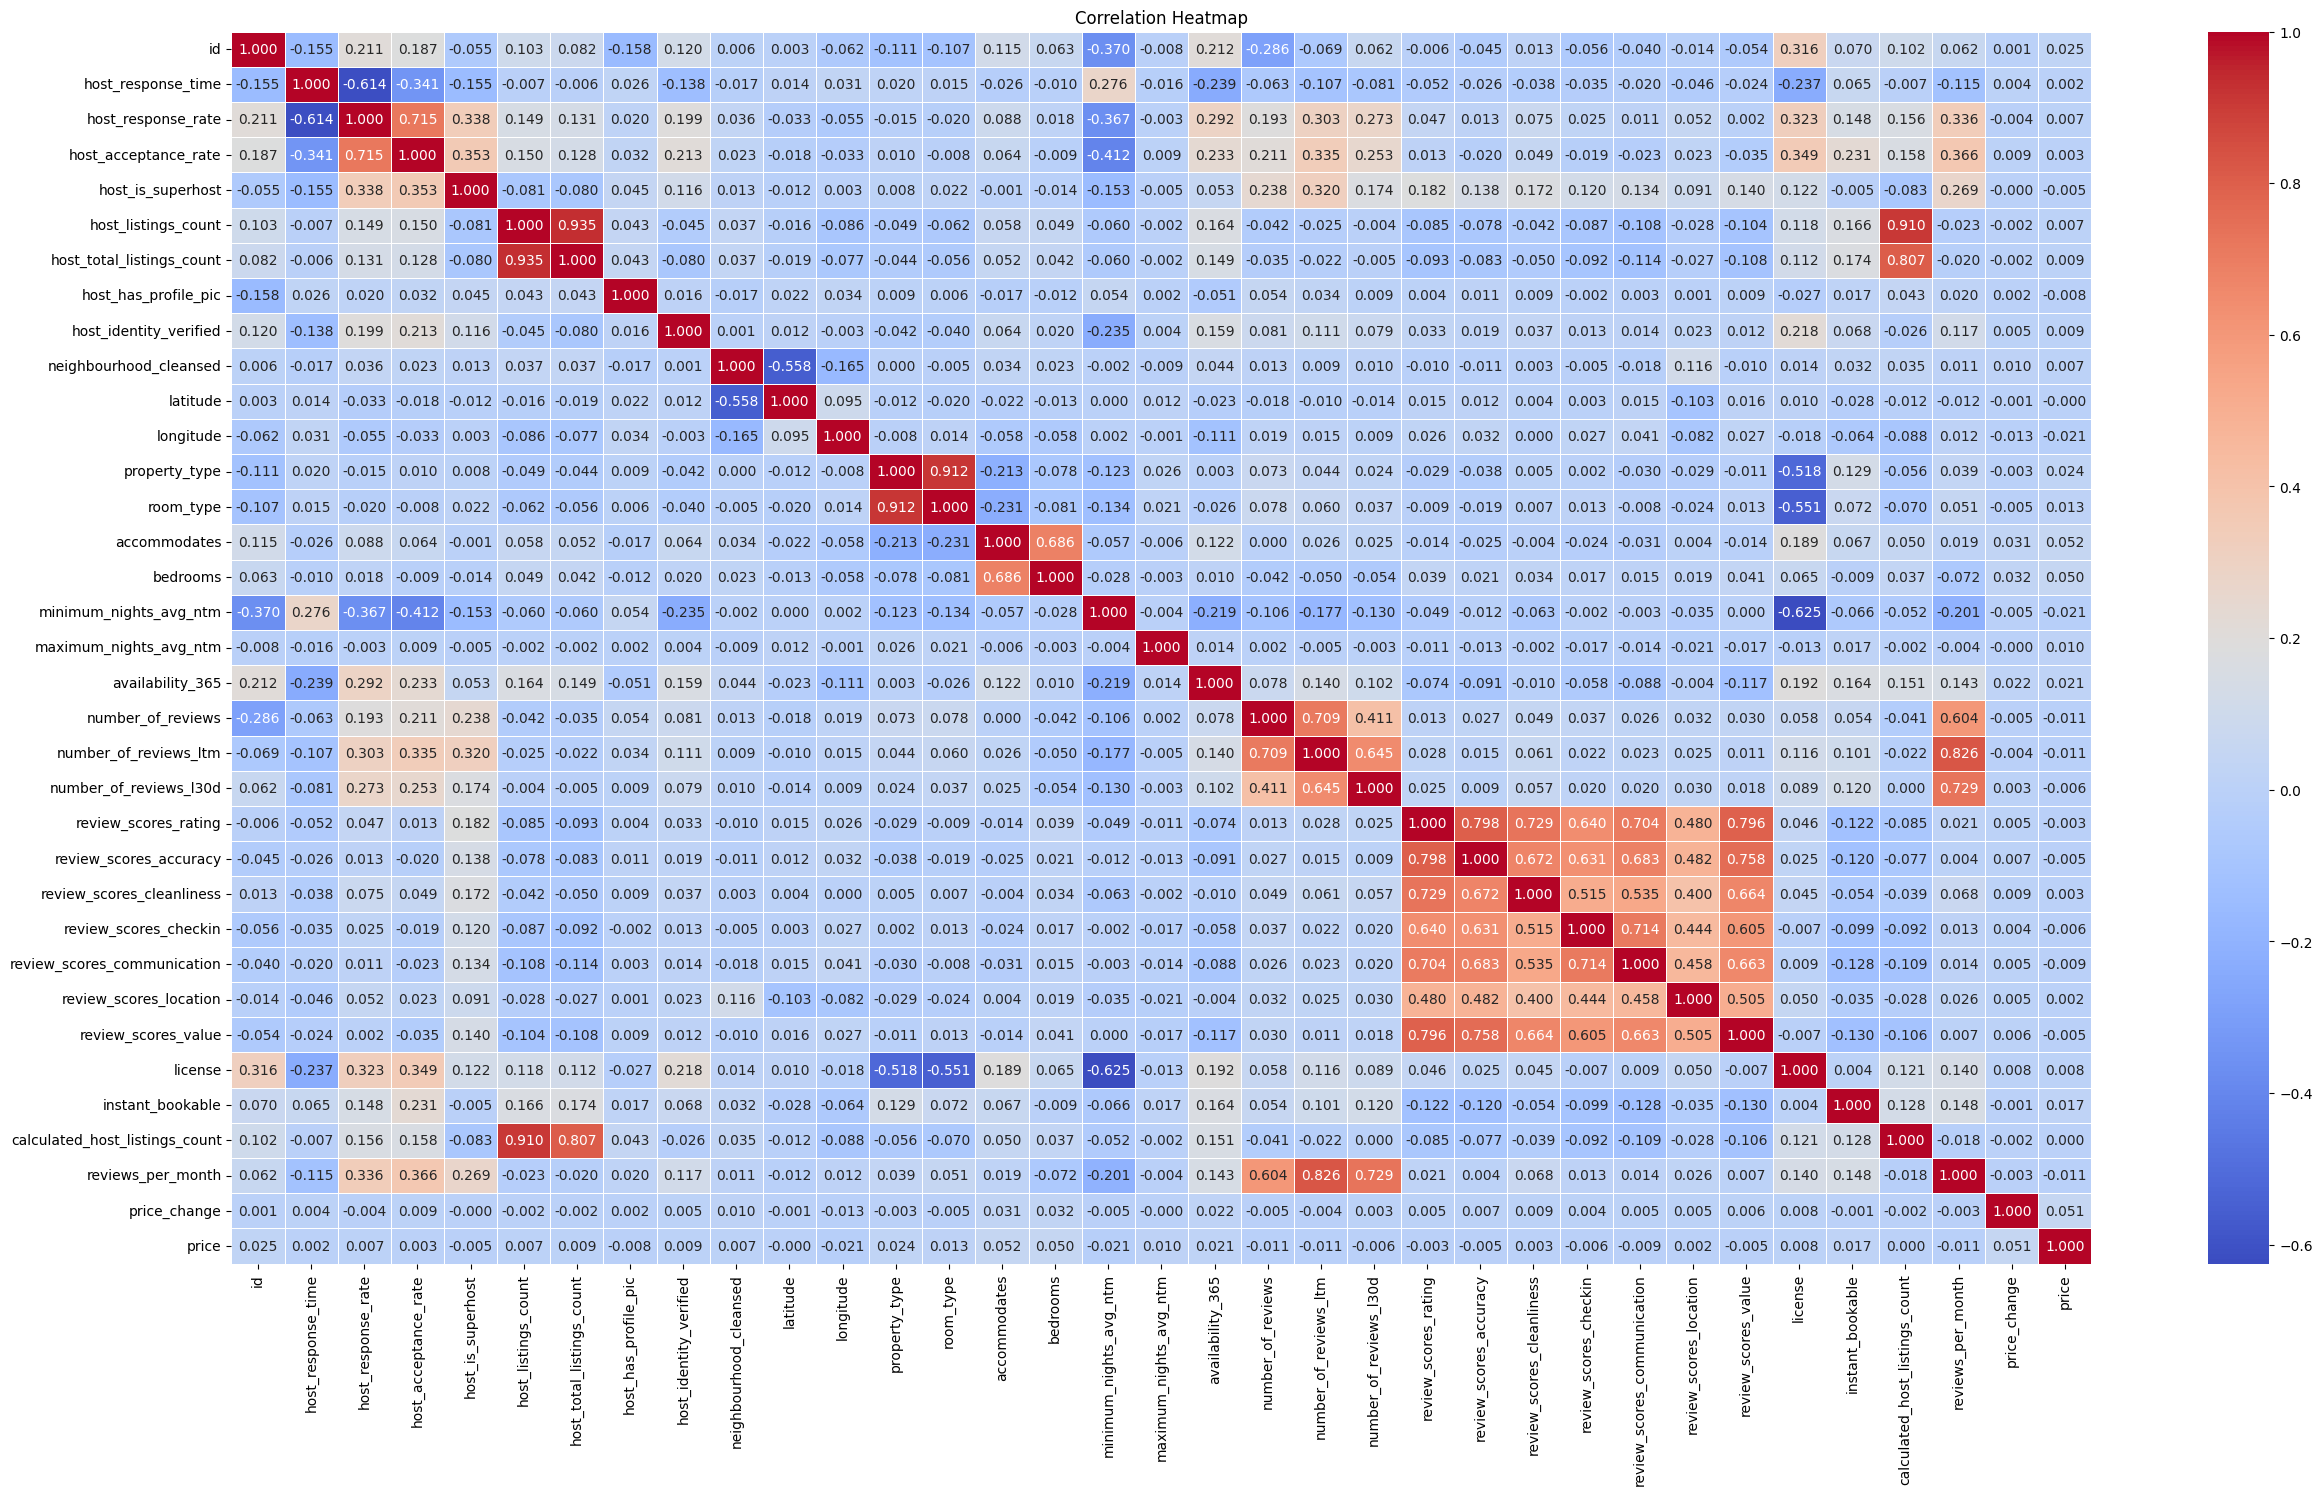

In [40]:
#Heatmap for correlation
plt.figure(figsize=(30, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [41]:
#Get corr and cov for listings where price changed
pc_correlation_matrix, pc_covariance_matrix = corr_cov(df_pricechange)


id and id:
Covariance: 204693840107403135707648443042234368.000000
Correlation: 1.000000

id and host_response_time:
Covariance: -154862242638073472.000000
Correlation: -0.383441

id and host_response_rate:
Covariance: 53600438013683632.000000
Correlation: 0.237946

id and host_acceptance_rate:
Covariance: -23376171636609404.000000
Correlation: -0.176633

id and host_is_superhost:
Covariance: -49094753221504584.000000
Correlation: -0.278016

id and host_listings_count:
Covariance: 1002583661786050048.000000
Correlation: 0.184322

id and host_total_listings_count:
Covariance: 492735388790627712.000000
Correlation: 0.076149

id and host_has_profile_pic:
Covariance: -9792195199398198.000000
Correlation: -0.124393

id and host_identity_verified:
Covariance: 0.000000
Correlation: nan

id and neighbourhood_cleansed:
Covariance: 58998692316464328.000000
Correlation: 0.031628

id and latitude:
Covariance: -733794374951810.625000
Correlation: -0.229810

id and longitude:
Covariance: 9382129844

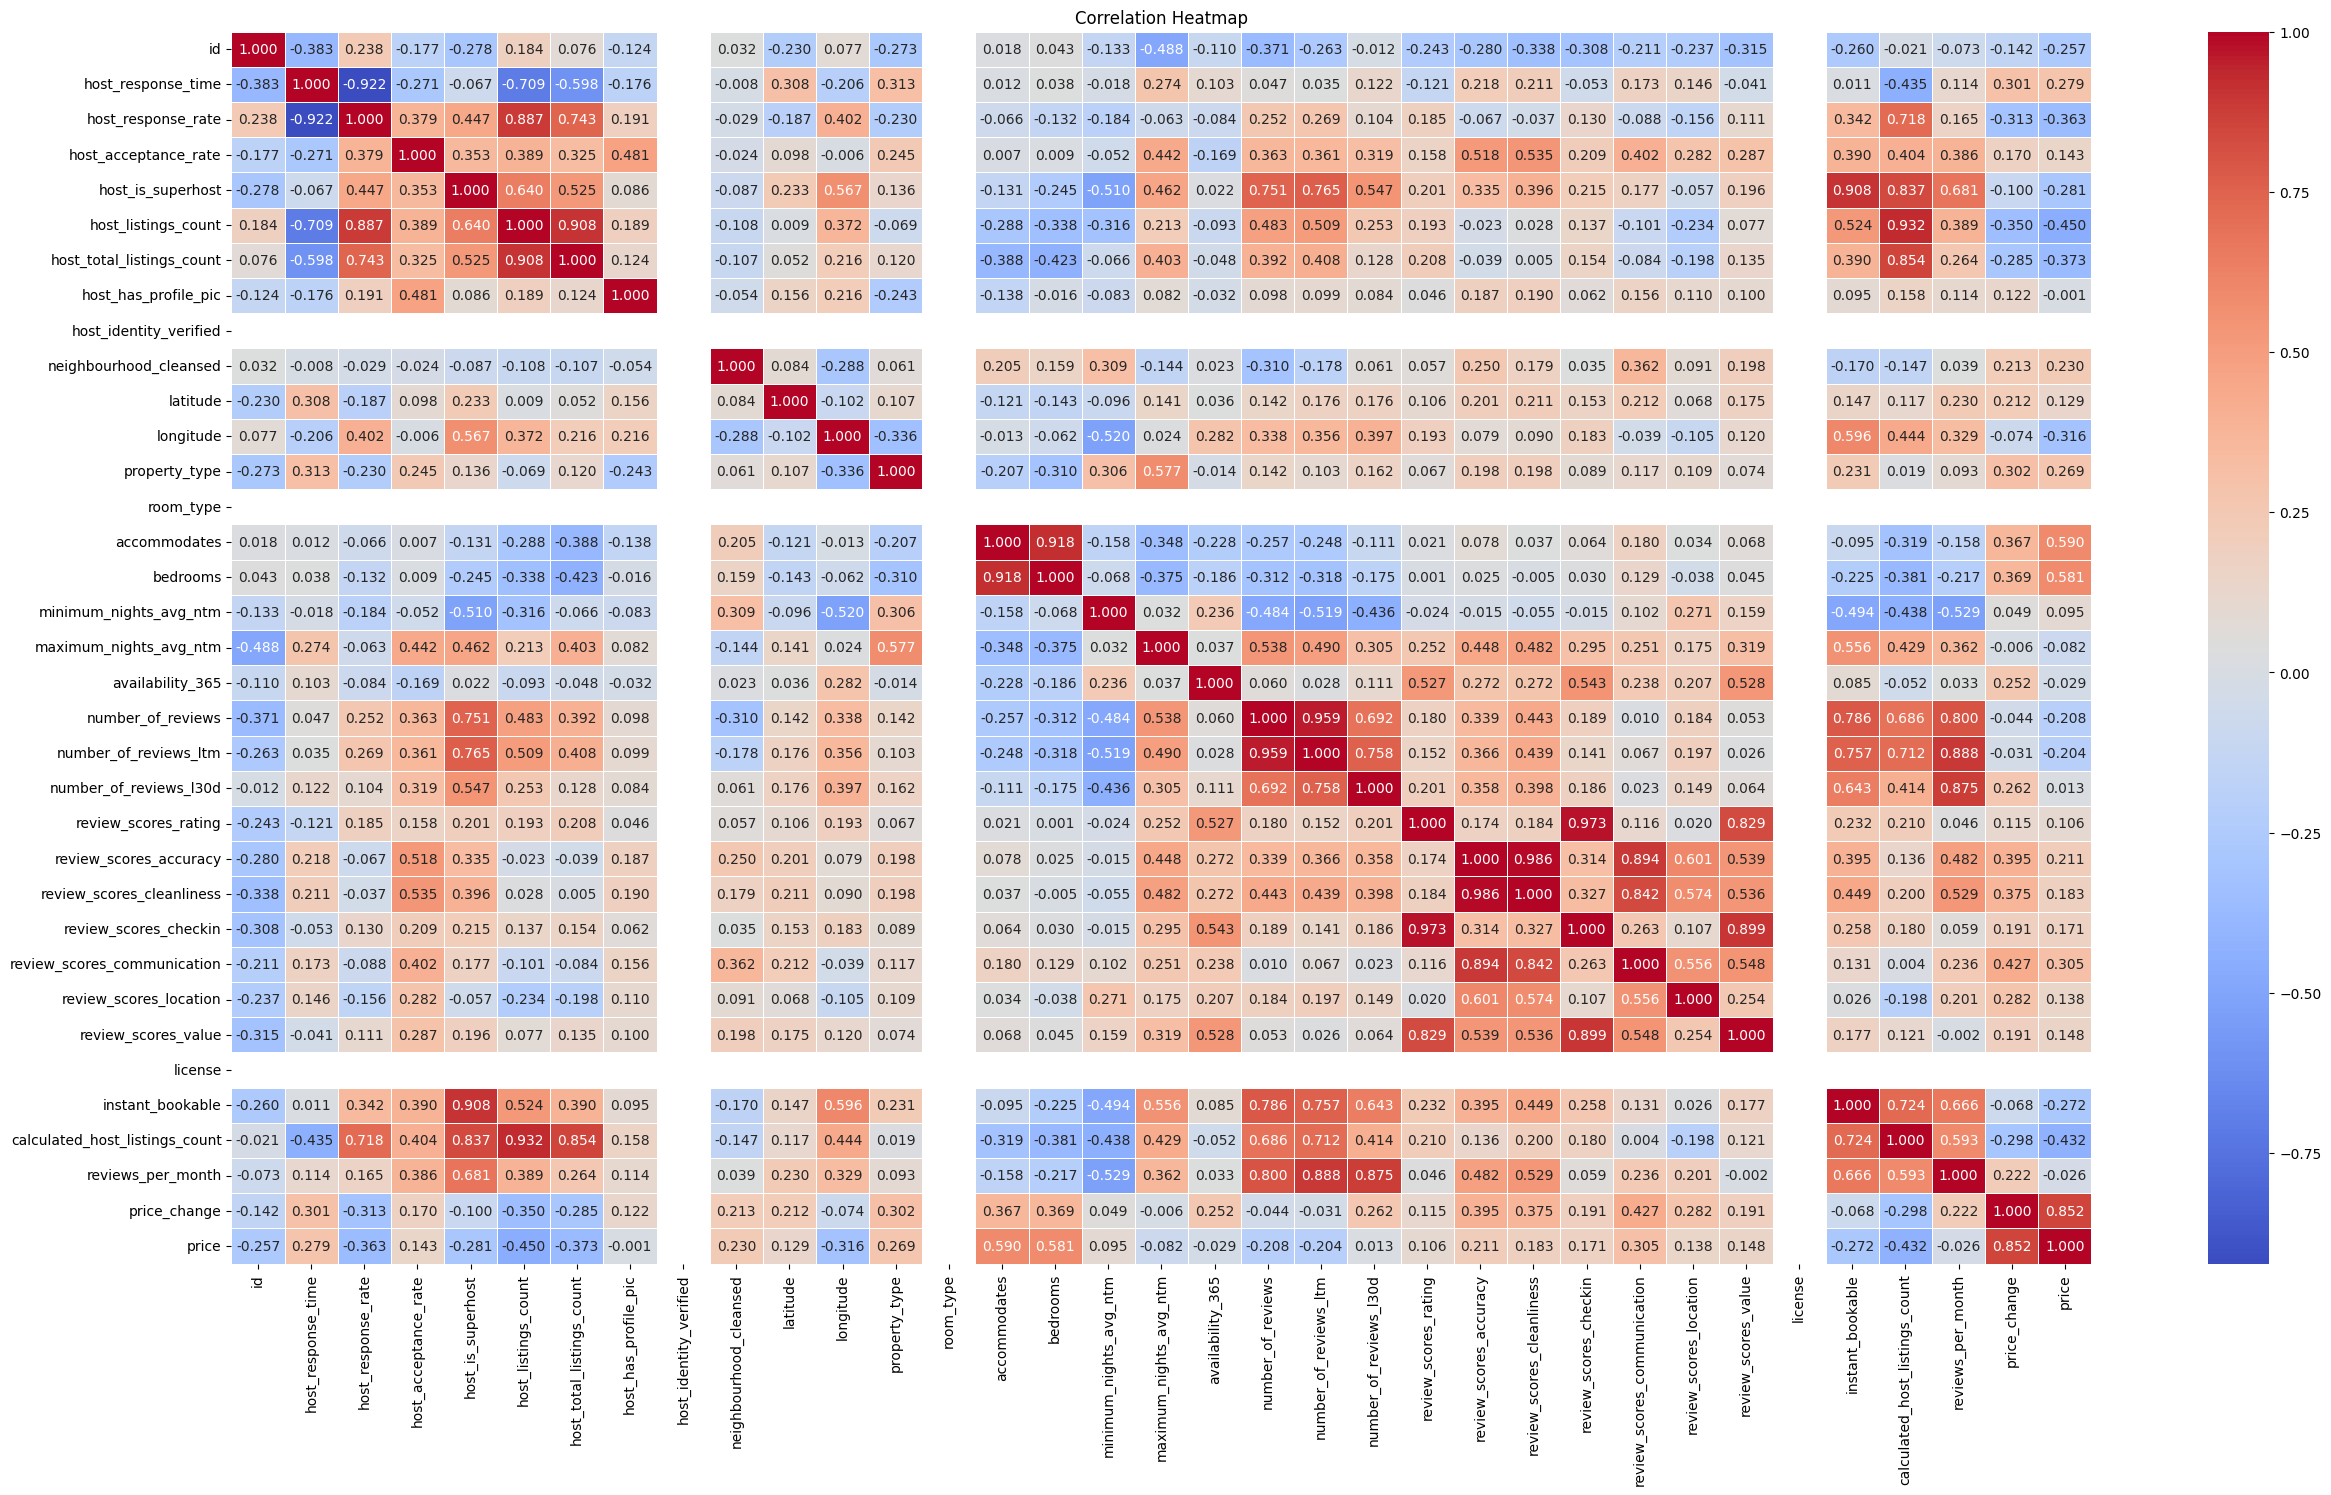

In [42]:
#Heatmap for correlation for listings where price changed
plt.figure(figsize=(30, 16))
sns.heatmap(pc_correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='price_change', ylabel='host_response_rate'>

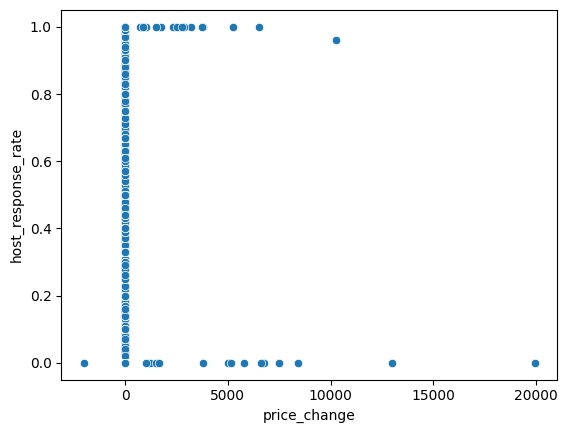

In [43]:
sns.scatterplot(data=df_cleaned, x='price_change', y='host_response_rate')

<Axes: xlabel='price_change', ylabel='neighbourhood_cleansed'>

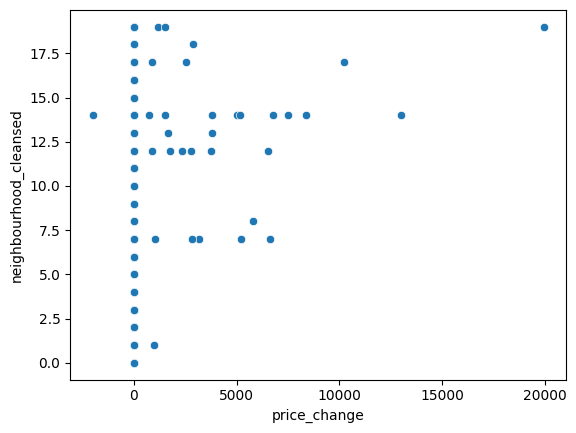

In [44]:
sns.scatterplot(data=df_cleaned, x='price_change', y='neighbourhood_cleansed')

<Axes: xlabel='price_change', ylabel='property_type'>

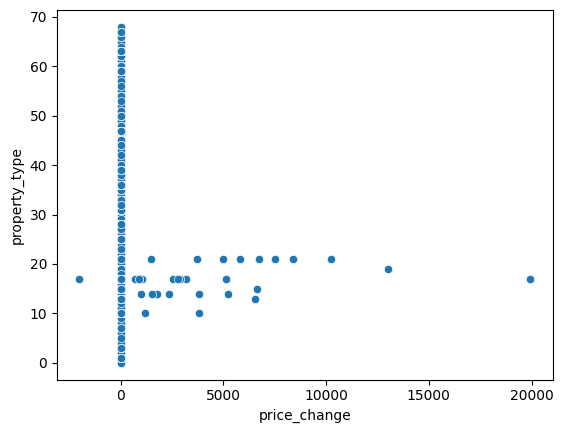

In [45]:
sns.scatterplot(data=df_cleaned, x='price_change', y='property_type')

<Axes: xlabel='price_change', ylabel='review_scores_communication'>

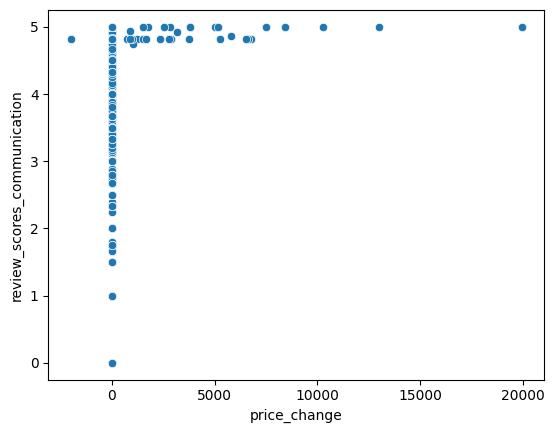

In [46]:
sns.scatterplot(data=df_cleaned, x='price_change', y='review_scores_communication')

<Axes: xlabel='price_change', ylabel='host_listings_count'>

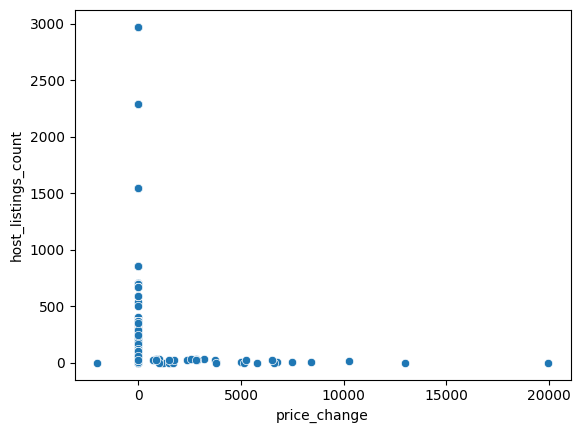

In [47]:
sns.scatterplot(data=df_cleaned, x='price_change', y='host_listings_count')

<Axes: xlabel='price_change', ylabel='bedrooms'>

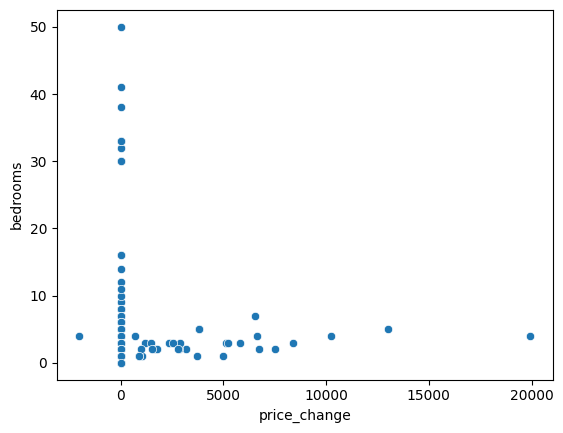

In [48]:
sns.scatterplot(data=df_cleaned, x='price_change', y='bedrooms')

<Axes: xlabel='price_change', ylabel='review_scores_rating'>

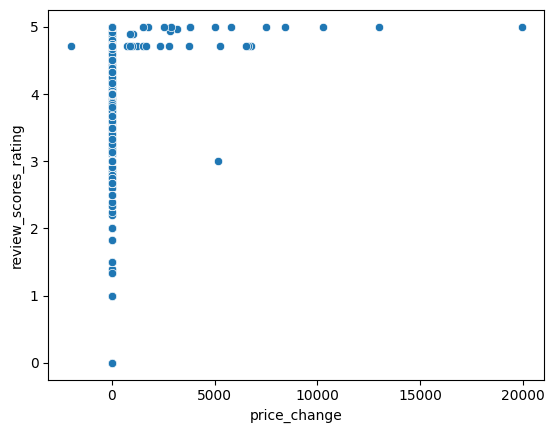

In [49]:
sns.scatterplot(data=df_cleaned, x='price_change', y='review_scores_rating')

<Axes: xlabel='price_change', ylabel='review_scores_value'>

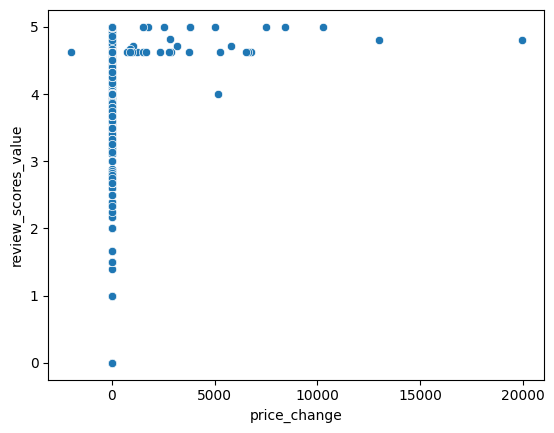

In [50]:
sns.scatterplot(data=df_cleaned, x='price_change', y='review_scores_value')

## Apply KMeans

In [51]:
# Helper function for silhouette scores

def sil_score(data, number_of_clusters):
    # Evaluate silhouette scores for different numbers of clusters
    ks = range(2, number_of_clusters+1)
    silhouettes = []
    X = data

    for k in ks:
        # Instantiate and fit K-Means
        km = KMeans(n_clusters=k, random_state=1)
        labels = km.fit_predict(X)

        # Silhouette score (only valid for k > 1)
        s_score = silhouette_score(X, labels)
        silhouettes.append(s_score)
        print(f"For n_clusters = {k}, the average silhouette score is {s_score:.4f}")

    # Plot silhouette scores
    plt.figure(figsize=(8, 4))
    plt.plot(ks, silhouettes, marker='o')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Average Silhouette Score")
    plt.title("Silhouette Scores")
    plt.show()
    
    return silhouettes, ks

In [52]:
# Perform KMeans function
def run_kmeans(data, n_of_clusters):
    
    # Get silhouette scores
    silhouettes, ks = sil_score(data, n_of_clusters)
    
    # Determine the best k from the silhouette scores
    best_k = ks[np.argmax(silhouettes)]
    print(f"The best number of clusters based on silhouette score is: {best_k}")
    
    # Perform KMeans
    km = KMeans(n_clusters = best_k, random_state = 1)
    km.fit(data)
    
    # Distribution of labels
    print(np.unique(km.labels_, return_counts=True))
    
    # Visualisation of KMeans
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=km.labels_, cmap = 'Set1')
    plt.xlabel(f'{data.columns[0]}')
    plt.ylabel(f'{data.columns[1]}')
    plt.title(f"K-means Clustering ({best_k} Clusters)")
    plt.show()

In [53]:
robust_scaler = RobustScaler()

df_cleaned['scaled_price_change'] = robust_scaler.fit_transform(df_cleaned[['price_change']])

For n_clusters = 2, the average silhouette score is 0.9997
For n_clusters = 3, the average silhouette score is 0.9997
For n_clusters = 4, the average silhouette score is 0.9996
For n_clusters = 5, the average silhouette score is 0.9996
For n_clusters = 6, the average silhouette score is 0.9994
For n_clusters = 7, the average silhouette score is 0.9994
For n_clusters = 8, the average silhouette score is 0.9994
For n_clusters = 9, the average silhouette score is 0.9994
For n_clusters = 10, the average silhouette score is 0.9994


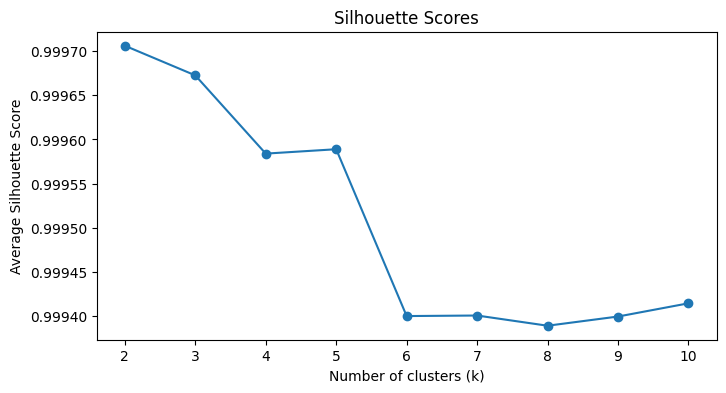

The best number of clusters based on silhouette score is: 2
(array([0, 1], dtype=int32), array([84382,    15]))


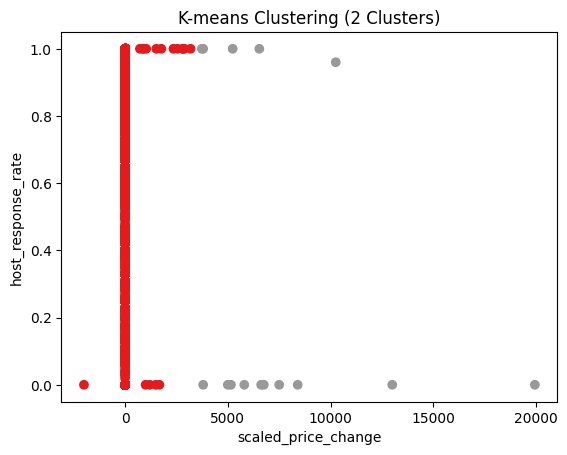

In [54]:
data_1 = df_cleaned[['scaled_price_change', 'host_response_rate']]
run_kmeans(data_1, 10)

For n_clusters = 2, the average silhouette score is 0.9989
For n_clusters = 3, the average silhouette score is 0.9983
For n_clusters = 4, the average silhouette score is 0.9978
For n_clusters = 5, the average silhouette score is 0.9978
For n_clusters = 6, the average silhouette score is 0.9971
For n_clusters = 7, the average silhouette score is 0.9941
For n_clusters = 8, the average silhouette score is 0.6758
For n_clusters = 9, the average silhouette score is 0.6758
For n_clusters = 10, the average silhouette score is 0.6772


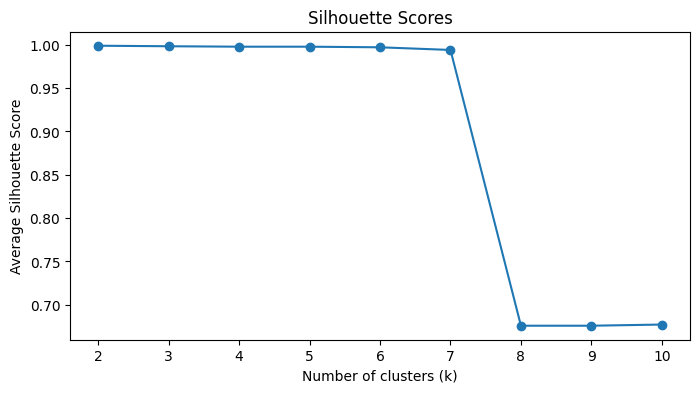

The best number of clusters based on silhouette score is: 2
(array([0, 1], dtype=int32), array([84385,    12]))


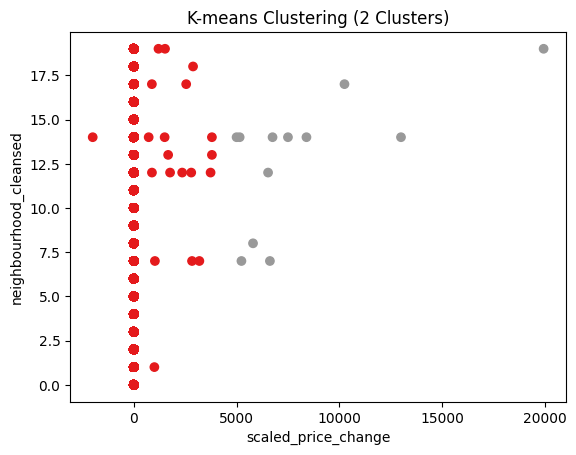

In [55]:
data_2 = df_cleaned[['scaled_price_change', 'neighbourhood_cleansed']]
run_kmeans(data_2, 10)

For n_clusters = 2, the average silhouette score is 0.9992
For n_clusters = 3, the average silhouette score is 0.9989
For n_clusters = 4, the average silhouette score is 0.9983
For n_clusters = 5, the average silhouette score is 0.9983
For n_clusters = 6, the average silhouette score is 0.9978
For n_clusters = 7, the average silhouette score is 0.9956
For n_clusters = 8, the average silhouette score is 0.9956
For n_clusters = 9, the average silhouette score is 0.9956
For n_clusters = 10, the average silhouette score is 0.9394


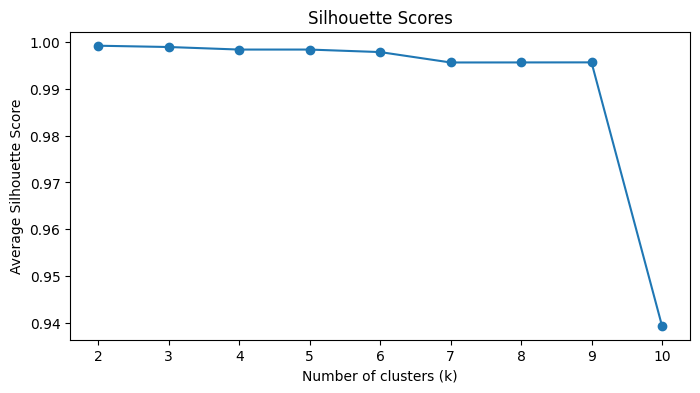

The best number of clusters based on silhouette score is: 2
(array([0, 1], dtype=int32), array([84385,    12]))


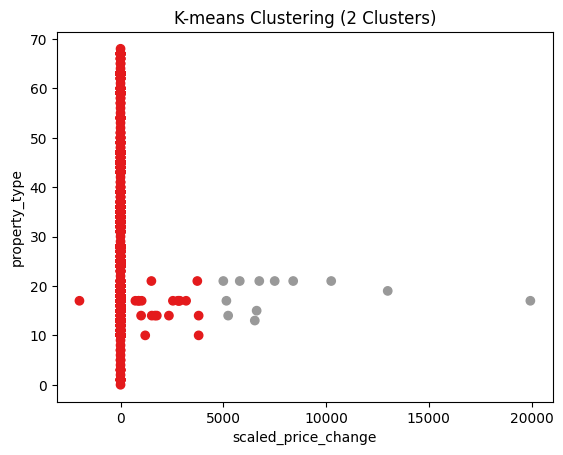

In [56]:
data_3 = df_cleaned[['scaled_price_change', 'property_type']]
run_kmeans(data_3, 10)

For n_clusters = 2, the average silhouette score is 0.9997
For n_clusters = 3, the average silhouette score is 0.9997
For n_clusters = 4, the average silhouette score is 0.9997
For n_clusters = 5, the average silhouette score is 0.9997
For n_clusters = 6, the average silhouette score is 0.9996
For n_clusters = 7, the average silhouette score is 0.9996
For n_clusters = 8, the average silhouette score is 0.9996
For n_clusters = 9, the average silhouette score is 0.9996
For n_clusters = 10, the average silhouette score is 0.9996


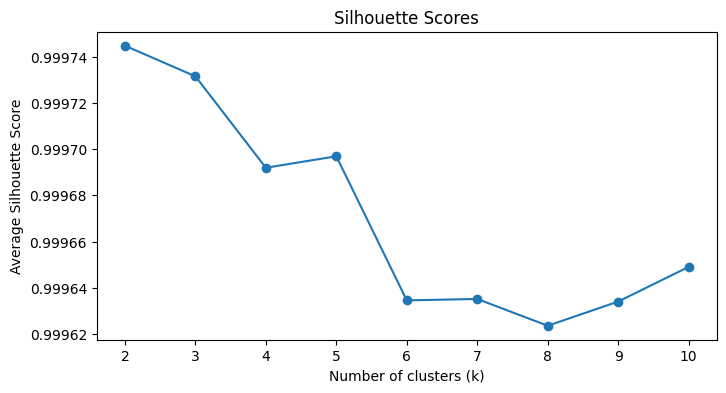

The best number of clusters based on silhouette score is: 2
(array([0, 1], dtype=int32), array([84382,    15]))


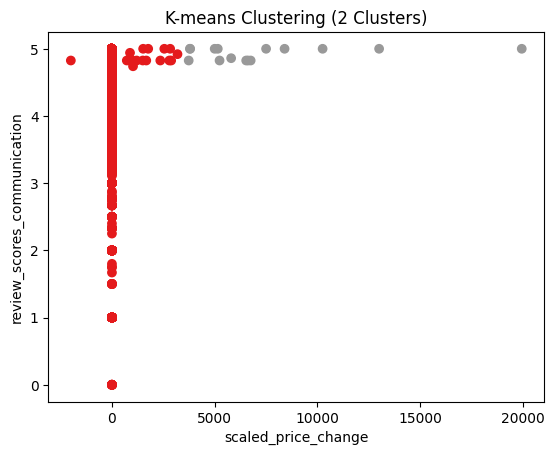

In [57]:
data_4 = df_cleaned[['scaled_price_change', 'review_scores_communication']]
run_kmeans(data_4, 10)

For n_clusters = 2, the average silhouette score is 0.9938
For n_clusters = 3, the average silhouette score is 0.9895
For n_clusters = 4, the average silhouette score is 0.9553
For n_clusters = 5, the average silhouette score is 0.9554
For n_clusters = 6, the average silhouette score is 0.9152
For n_clusters = 7, the average silhouette score is 0.9156
For n_clusters = 8, the average silhouette score is 0.9132
For n_clusters = 9, the average silhouette score is 0.9137
For n_clusters = 10, the average silhouette score is 0.9149


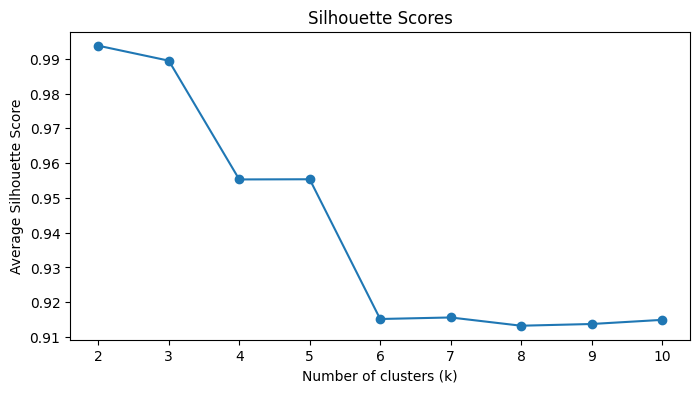

The best number of clusters based on silhouette score is: 2
(array([0, 1], dtype=int32), array([84385,    12]))


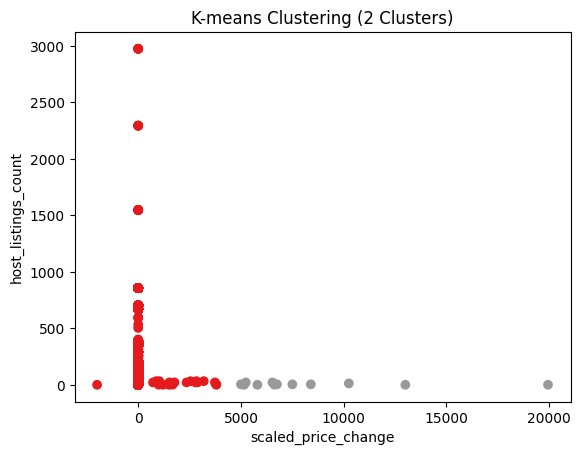

In [58]:
data_5 = df_cleaned[['scaled_price_change', 'host_listings_count']]
run_kmeans(data_5, 10)

For n_clusters = 2, the average silhouette score is 0.9997
For n_clusters = 3, the average silhouette score is 0.9996
For n_clusters = 4, the average silhouette score is 0.9995
For n_clusters = 5, the average silhouette score is 0.9995
For n_clusters = 6, the average silhouette score is 0.9992
For n_clusters = 7, the average silhouette score is 0.9992
For n_clusters = 8, the average silhouette score is 0.9992
For n_clusters = 9, the average silhouette score is 0.9992
For n_clusters = 10, the average silhouette score is 0.9992


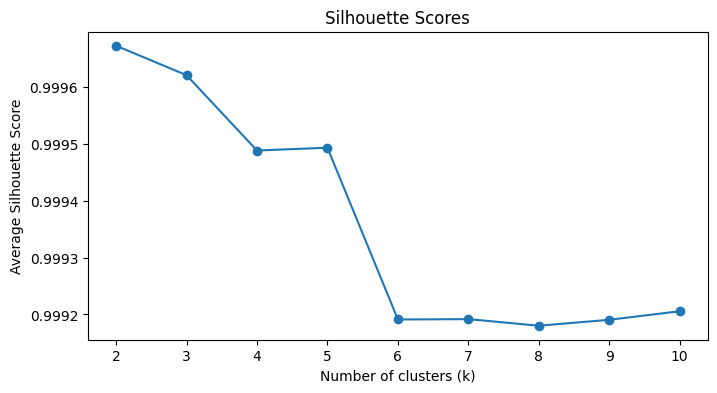

The best number of clusters based on silhouette score is: 2
(array([0, 1], dtype=int32), array([84382,    15]))


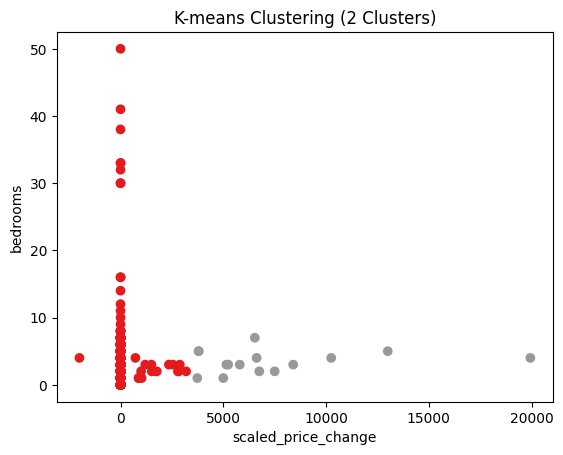

In [59]:
data_6 = df_cleaned[['scaled_price_change', 'bedrooms']]
run_kmeans(data_6, 10)

For n_clusters = 2, the average silhouette score is 0.9997
For n_clusters = 3, the average silhouette score is 0.9997
For n_clusters = 4, the average silhouette score is 0.9997
For n_clusters = 5, the average silhouette score is 0.9997
For n_clusters = 6, the average silhouette score is 0.9996
For n_clusters = 7, the average silhouette score is 0.9996
For n_clusters = 8, the average silhouette score is 0.9996
For n_clusters = 9, the average silhouette score is 0.9996
For n_clusters = 10, the average silhouette score is 0.9996


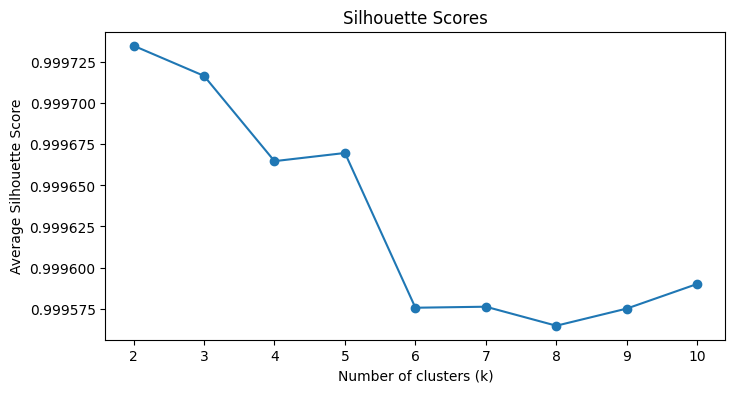

The best number of clusters based on silhouette score is: 2
(array([0, 1], dtype=int32), array([84382,    15]))


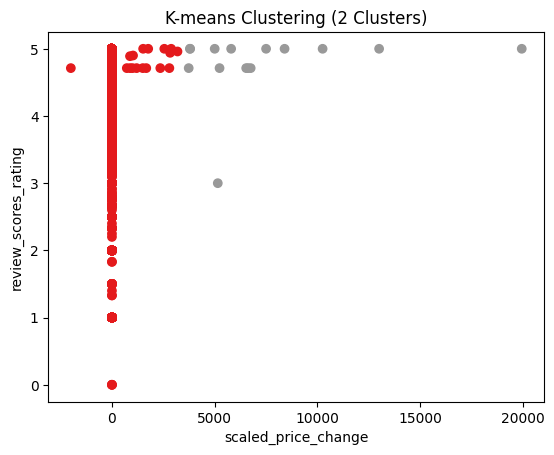

In [60]:
data_7 = df_cleaned[['scaled_price_change', 'review_scores_rating']]
run_kmeans(data_7, 10)

For n_clusters = 2, the average silhouette score is 0.9997
For n_clusters = 3, the average silhouette score is 0.9997
For n_clusters = 4, the average silhouette score is 0.9997
For n_clusters = 5, the average silhouette score is 0.9997
For n_clusters = 6, the average silhouette score is 0.9995
For n_clusters = 7, the average silhouette score is 0.9995
For n_clusters = 8, the average silhouette score is 0.9995
For n_clusters = 9, the average silhouette score is 0.9995
For n_clusters = 10, the average silhouette score is 0.9996


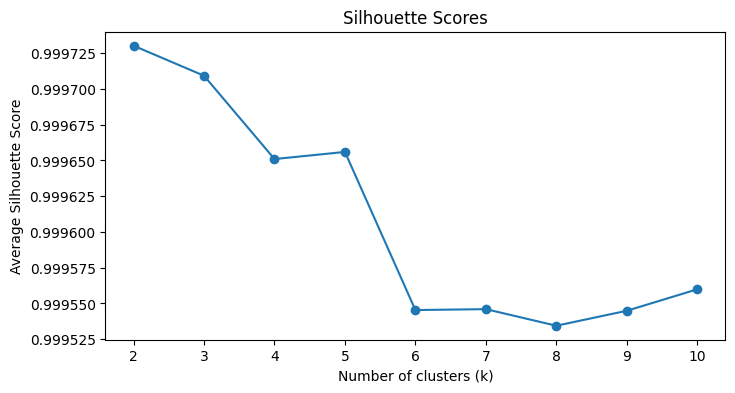

The best number of clusters based on silhouette score is: 2
(array([0, 1], dtype=int32), array([84382,    15]))


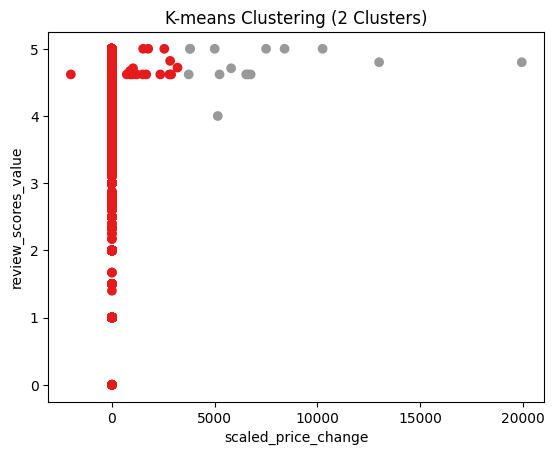

In [61]:
data_8 = df_cleaned[['scaled_price_change', 'review_scores_value']]
run_kmeans(data_8, 10)

## Apply PCA

In [62]:
# standardize --> PCA works better when data is standardized/normalized
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

# find n components

# Apply PCA
pca = PCA(n_components=0.95) # want top n components to explain at least 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Get percentage of variance explained for each components
print('explained variance ratio: %s' % str(pca.explained_variance_ratio_))

optimal_n = pca.n_components_

# Print how many PCs were chosen
print(f"Optimal number of components: {optimal_n}")

explained variance ratio: [0.13636226 0.11770787 0.08544465 0.06805711 0.05595383 0.05416348
 0.04647725 0.04235563 0.03398019 0.02860502 0.02835147 0.02761479
 0.0272319  0.02513938 0.02406537 0.02376849 0.02121858 0.02000293
 0.01721927 0.01564328 0.01302057 0.01213393 0.01177766 0.0092352
 0.00790222]
Optimal number of components: 25


In [63]:
# Do PCA with right amount of components
pca = PCA(n_components=optimal_n)

# Fit and transform
X_r = pca.fit(X_scaled).transform(X_scaled)


# Create DataFrame of PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=df_cleaned.columns) # Transpose so rows = features

pd.set_option('display.max_columns', None) 
print("PCA Component Loadings (Feature Weights):")
print(loadings)

PCA Component Loadings (Feature Weights):
                                     PC1       PC2       PC3       PC4  \
id                             -0.022031  0.135842  0.182025 -0.150905   
host_response_time             -0.048958 -0.214525 -0.034190  0.107050   
host_response_rate              0.055483  0.358874  0.033504 -0.028682   
host_acceptance_rate            0.035687  0.354765  0.009598 -0.009235   
host_is_superhost               0.129503  0.181625 -0.112786 -0.030117   
host_listings_count            -0.103659  0.148192  0.372390  0.380108   
host_total_listings_count      -0.104619  0.139319  0.353790  0.372037   
host_has_profile_pic            0.004398  0.005238 -0.019604  0.072087   
host_identity_verified          0.036177  0.145342 -0.005210 -0.135271   
neighbourhood_cleansed          0.000976  0.030221  0.036469  0.040016   
latitude                       -0.000701 -0.022318 -0.015302 -0.041369   
longitude                       0.017476 -0.038542 -0.075844 -0.040097

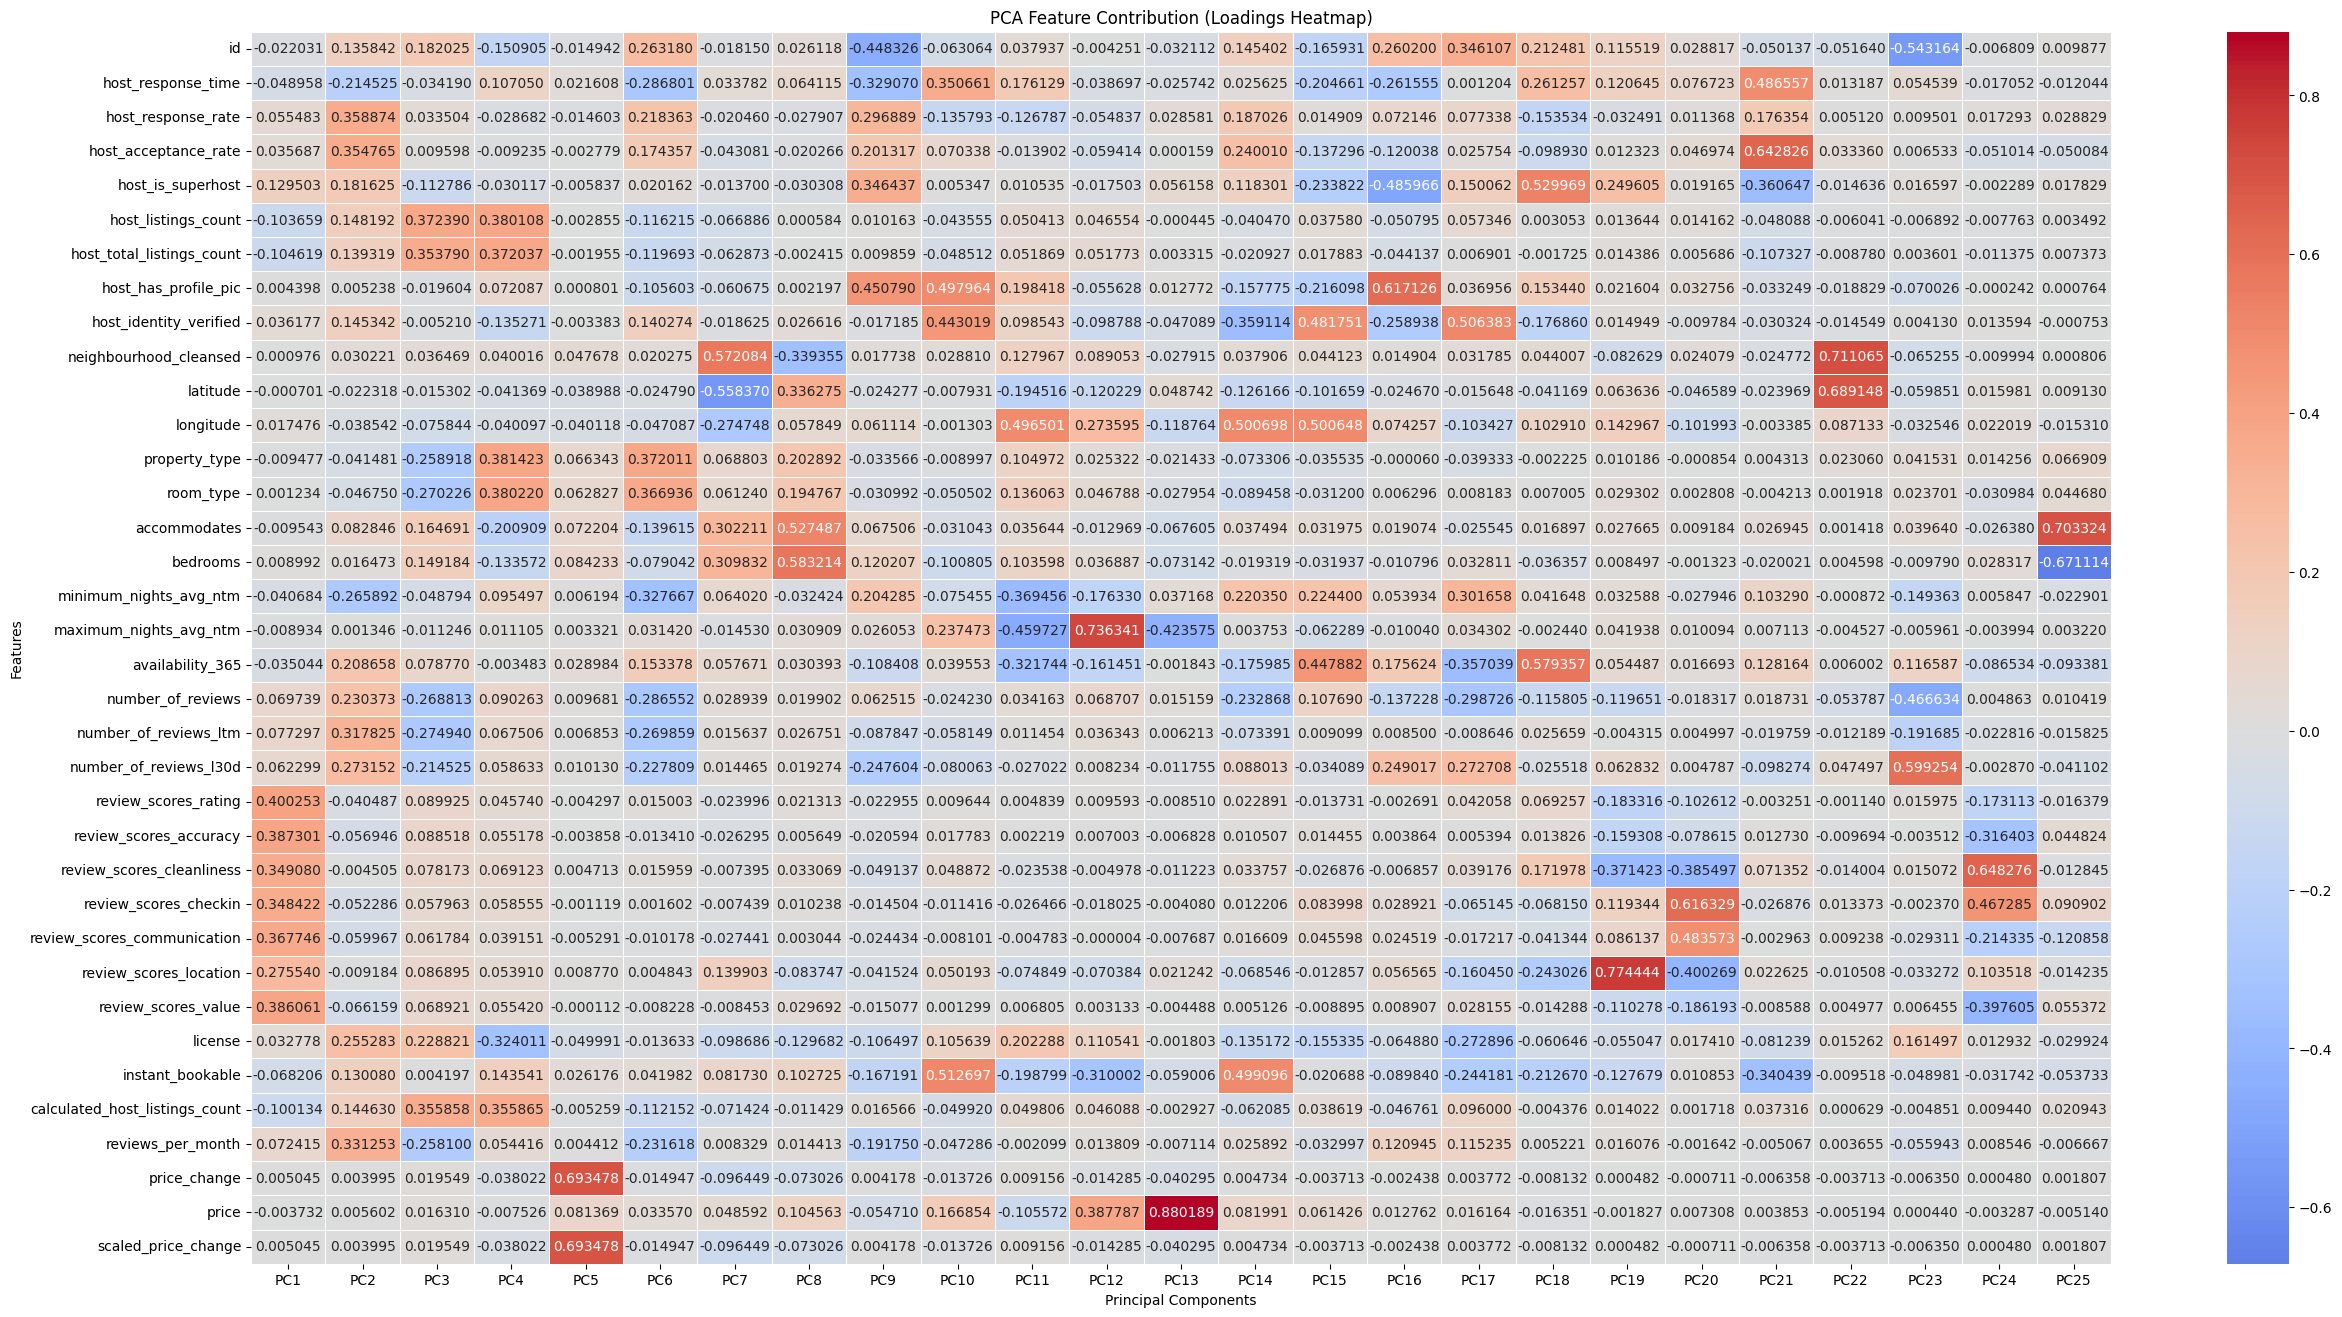

In [64]:
plt.figure(figsize=(30, 16))
sns.heatmap(loadings, annot=True, cmap="coolwarm", fmt="3f", linewidths=0.5, center=0)
plt.xlabel("Principal Components")
plt.ylabel("Features")
plt.title("PCA Feature Contribution (Loadings Heatmap)")
plt.show()

Price changes and price contibute most to PC9 and PC 13. In PC 13 there is not really another feature contributing to the component. In PC9 we see that instant_bookable, availability_365, host_identity_verified and host_has_a_profile_pic contribute a little bit to this component, which tells us that these might have some impact on price_changes.